**Individual EDA** - *Aidan Murphy*
--
This EDA aims to take a more holistic view of the dataset using the consoles as microchosims of the system which surrounds videogames. By doing this we can try and explore how different factors affect the sale of videogames, and other factors

## research questions:
 - How many games are available on different consoles?
 - Factors affecting the success of a console (measured by global sales)
 
### Basic description:
The raw data was obtained from [kaggle]("https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings"), and is a user compiled data set which extends a scrape already performed by Metacritic. It includes over 16,000 entries, of which ~6,900 have all aspects complete. Each entry features a videogame and the console/platform it was released on, and entries include release dates from 1980 to 2016. As the extracted information will show, this dataset is likely not complete, and once incomplete entries are removed, it is very much a random selection of games from the 80's to the mid 2010's.

The dataset uses the word Platforms, I will be using the word Consoles in this EDA.
 

# Basic data manipulation
because we are going to look at a few different aspects of the data we are goin to need to change the data in different ways throughout, so to start we are just going to do some basic cleaning up, starting by importing the necessary packages:

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling as pdp

sns.set_style("ticks")

In [79]:
from AidsProject_functions import sortconsole
from AidsProject_functions import available
from AidsProject_functions import popular

import sys
sys.path.insert(1, '../../scripts')

# Imports the project_functions.py file containing the different functions
import project_functions


In [80]:
##import data and perform basic cleaning (i.e, removing unwanted columns and adding new columns)

df = project_functions.load_and_process()
df = available(sortconsole(df))
print(len(df.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


../../scripts\project_functions.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata.User_Score[rownumber] = 'NaN'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             6825 non-null   string  
 1   Platform         6825 non-null   category
 2   Year_of_Release  6825 non-null   int64   
 3   Genre            6825 non-null   category
 4   Publisher        6825 non-null   string  
 5   NA_Sales         6825 non-null   float64 
 6   EU_Sales         6825 non-null   float64 
 7   JP_Sales         6825 non-null   float64 
 8   Other_Sales      6825 non-null   float64 
 9   Global_Sales     6825 non-null   float64 
 10  Critic_Score     6825 non-null   float64 
 11  Critic_Count     6825 non-null   float64 
 12  User_Score       6825 non-null   float64 
 13  User_Count       6825 non-null   float64 
 14  Developer        6825 non-null   string  
 15  Rating           6825 non-null   category
dtypes: category(3), float64(9), int64(1), stri

../../scripts\project_functions.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Name'] = dataclean['Name'].astype("string")
../../scripts\project_functions.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Platform'] = dataclean['Platform'].astype("category")
../../scripts\project_functions.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

# info by regions
as you will see the number of games available to each region is not that different so we are going to use global sales beyond this when measuring the success of videogames for a particular console.

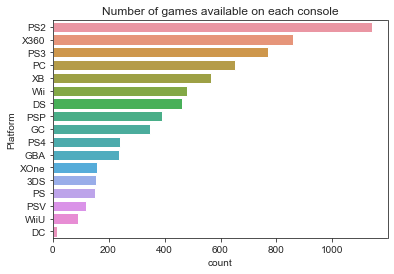

In [81]:

plot = sns.countplot(y = 'Platform',data = df,order = df['Platform'].value_counts().index).set_title("Number of games available on each console")

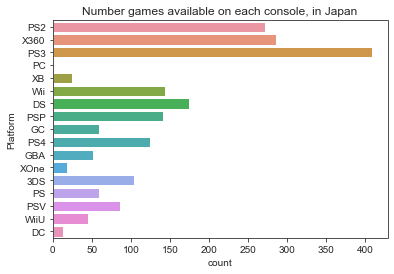

In [82]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.JP < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in Japan")

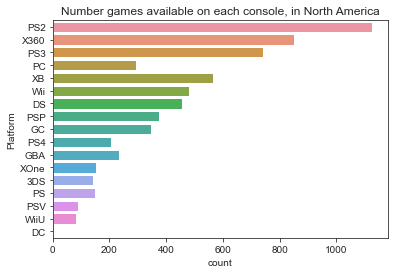

In [83]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.NA < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in North America")

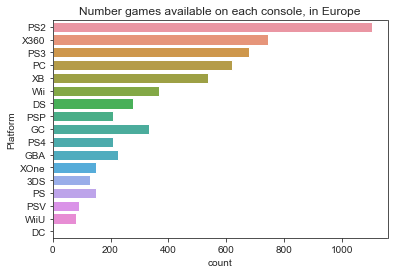

In [84]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.EU < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in Europe")

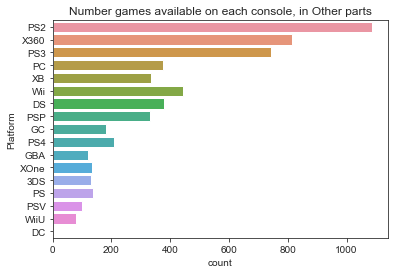

In [85]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.OTHER < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in Other parts")


### available games on each console
It would seem that all over the world the 3 consoles with the largest selection of games would be the PS2, followed by the Xbox 360, and then the ps3. And then there are minor differences after that.
Something interesting to note is that Japan supposedly has 0 games available on PC which suggests that gaming on a computer is either non-existent or that not all games sales are accounted for; most likely the latter.

These graphs also show that data relating to these consoles may vary from region to region, which is most prominently seen in japan, where the availability of games for consoles is more polarized between limited or plentiful

we can also see that there are few games available on the DreamCast (DC), so I have written a function to remove entries that belong to a console with fewer than 80 games available worldwide (this should affect only the DC). see popular(df)

In [86]:
df = popular(df)

# **EDA**
## Global Sales
We are basically summing the global sales for every game available to a console, to give a rough estimate as to which games console is the most economically productive. This is very much partial to the number of games made for each console, which is affected by how long the console is available and at what point games are no longer released for the console. The critic's reception of previous games on the console can also create a bias towards the current games availabe and have a negative affect on the market; so we should try to see if there is some correlation between the critic score and global sales of a game. 

Again this is a just a culmination of the sales for each game on each console worldwide:

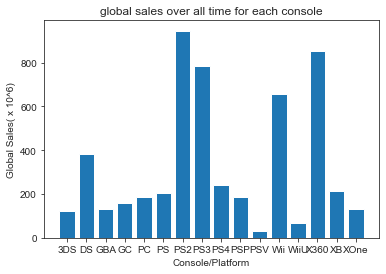

In [87]:
globalSales = {i : 0 for i in df.Platform.unique()} ##makes a dictionary with consoles, for the global sales of games on the console
for i in list(df.Platform.unique()):
    for j in df.index:
        if (df['Platform'][j] == i):
            globalSales[i] += df['Global_Sales'][j]

            
            
vert = list(globalSales.values())
plt.bar(x = list(range(0,len(df.Platform.unique()))), height = vert)
plt.title('global sales over all time for each console')
plt.xlabel('Console/Platform')
plt.ylabel('Global Sales( x 10^6)')
plt.xticks(list(range(0,len(df.Platform.unique()))), list(df.Platform.unique()))


plt.savefig('global sales over all time for each console.png', bbox_inches='tight')
plt.show()

## selection/variety

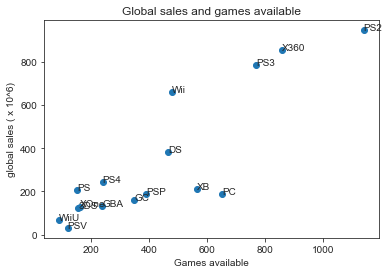

In [88]:
gamesAvailData = list(df['Platform'].value_counts()[df['Platform'].unique()])

z = gamesAvailData
y = list(globalSales.values())
n = list(df.Platform.unique())

fig, ax = plt.subplots()
plt.scatter(z, y)
plt.title('Global sales and games available')
plt.xlabel('Games available')
plt.ylabel('global sales ( x 10^6)')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
    
plt.savefig('global sales and games available.png', bbox_inches='tight')
plt.show()

There appears to be a correlation between the number of games available and the global sales, however I would say that the spread becomes larger as the number of games available increases, so this isn't very conclusive, lets try and normalize the data and see the expected global sales for a game on each console:

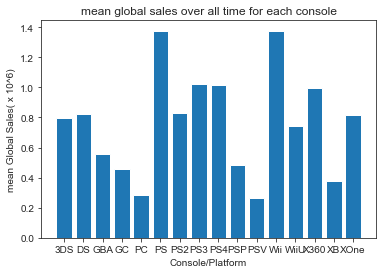

In [89]:
normGlobalSales = {i : 0 for i in df.Platform.unique()}  ##creating dictionary for normalized global sales, where we take the mean global sales for a particular platform
for i in list(df.Platform.unique()):
    normGlobalSales[i] = (globalSales[i]/(df.drop(df[df.Platform != i].index)['Name'].count()))



vert = list(normGlobalSales.values())
plt.bar(x = list(range(0,len(df.Platform.unique()))), height = vert)
plt.title('mean global sales over all time for each console')
plt.xlabel('Console/Platform')
plt.ylabel('mean Global Sales( x 10^6)')
plt.xticks(list(range(0,len(df.Platform.unique()))), list(df.Platform.unique()))

plt.savefig('mean global sales over all time for each console.png', bbox_inches='tight')
plt.show()

This data paints a very different picture of the success encountered in each platform, where it is no longer the PS2,PS3 and X360 far ahead of the rest of the platforms, but they are slightly more successful than most platforms; the PS and Wii seem to be evenly matched in terms of mean global sales, both far ahead of the competition.

Given that the PS was more active earlier in the 1980-2016 time window, before the spike in videogame sales in the mid 2000's, there are two ways I think this can be perceived, either that the lack of competition allowed PS to flourish, and it was to be expected; or that they exceeded expectation for an industry which was still developing. Personally I beleive that the lack of competition allowed PS to capitalize on their innovative products, and kickstart the competition which started to boom in the mid 2000's 

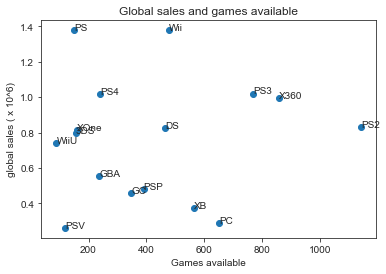

In [90]:
gamesAvailData = list(df['Platform'].value_counts()[df['Platform'].unique()])

z = gamesAvailData
y = list(normGlobalSales.values())
n = list(df.Platform.unique())

fig, ax = plt.subplots()
plt.scatter(z, y)
plt.title('Global sales and games available')
plt.xlabel('Games available')
plt.ylabel('global sales ( x 10^6)')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.savefig('mean global sales and games available.png', bbox_inches='tight')    
plt.show()

## individual consoles
as stated for the global sales, the above information is partial to many things, and as such not very useful when trying to look at relationships between particular variables. This problem can be overcome by normalizing our data with respect to whatever variables we are not testing or comparing. In order to do this we can make a dictionary with the unique platforms as keys and then extract information about each console as necessary to more accurately compare the relationships between certain variables.

In [91]:
dfConsole = {i : df.drop(df[df.Platform != i].index ) for i in list(df.Platform.unique())}

Now 'consoleStats' is a dictionary which contains the mean values of the columns for each console, so you can access the mean values of a column x for a console y as follows:

consoleStats[y][x]

and it should display a float:

In [92]:
consoleStats = {i : {dfConsole[i].mean().keys()[j] : dfConsole[i].mean()[j] for j in range(len(dfConsole[i].mean()))} for i in dfConsole}
print(consoleStats['PS3']['JP'])
print(consoleStats['PS3']['Year_of_Release'])

0.5305591677503251
2010.0910273081925


The above number indicates that 53% of all listed PS3 games listed, had a least one purchase in Japan, and that the average year of release for a PS3 game was in 2010.



## market timing
The time at which games are released, like many other forms of media, is very important to their success. The following graphs should give insight to how the different aspects of time affect the sales of videogames, using each console as a different sort of test.

### average year of release
lets start with the mean year of release for the games on each console

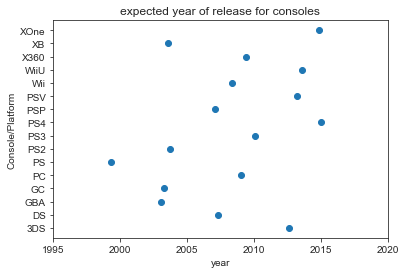

the above graph shows the expected release date for each platform




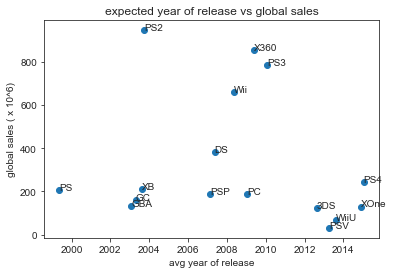

In [93]:
avgyear = {i : consoleStats[i]['Year_of_Release'] for i in list(df.Platform.unique())}

vert = list(avgyear.values())
plt.scatter(y = list(range(0,len(df.Platform.unique()))), x = vert)
plt.gca().set_xlim([1995,2020])
plt.title('expected year of release for consoles')
plt.xlabel('year')
plt.ylabel('Console/Platform')
plt.yticks(list(range(0,len(df.Platform.unique()))), list(df.Platform.unique()))

plt.savefig('expected year of release for consoles.png', bbox_inches='tight')
plt.show()
print("the above graph shows the expected release date for each platform")
print()
print()
#########

z = list(avgyear.values())
y = list(globalSales.values())
n = list(df.Platform.unique())

fig, ax = plt.subplots()
plt.scatter(z, y)
plt.title('expected year of release vs global sales')
plt.xlabel('avg year of release')
plt.ylabel('global sales ( x 10^6)')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
    
plt.savefig('expected year of release vs global sales.png', bbox_inches='tight')

As we can see in the above scatter plot, there is a definite peak around 2010, so consoles that were releasing games on average in 2010 were doing better than consoles who released games on average earlier than 2010. excluding the PS2 outlier this indicates that there was an increased demand for videogames around the 2009 - 2011 time period (the mid 2000's boom). This was most likely caused by the great succes of the PS and subsequently the PS2.

This is nice, but it would be good to obtain info about the range of years the consoles had active releases, which can be done with the box and whisker plot seen below:

###  what time period were games being made?
boxplot of the distrubtion of games over time

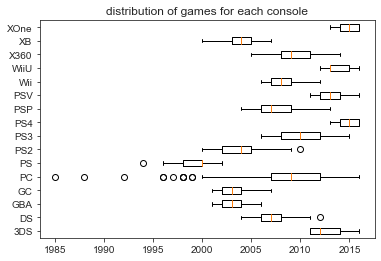

In [94]:
yeardata = list(dfConsole[i]['Year_of_Release'] for i in df.Platform.unique())
plt.boxplot(yeardata, vert = False)
plt.title('distribution of games for each console')
plt.yticks(list(range(1,len(df.Platform.unique())+1)), list(df.Platform.unique()))

plt.savefig('distribution of games for each console.png', bbox_inches='tight')
plt.show()

As can be seen the PS3, PS2, and XBOX 360 have had games released for a reasonably long time, so it is to be expected that the global sales are significantly larger than other consoles, whose life spans are significantly shorter. We can look directly at the life spans in the next box plot:


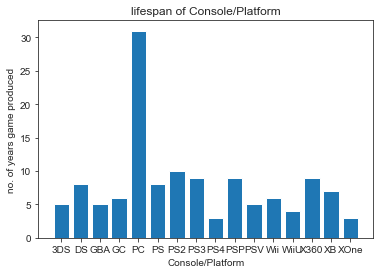

In [95]:
yrRangeData = {i : dfConsole[i]['Year_of_Release'].max() - dfConsole[i]['Year_of_Release'].min() for i in df.Platform.unique()}

vert = list(yrRangeData.values())
plt.bar(x = list(range(0,len(df.Platform.unique()))), height = vert)
plt.title('lifespan of Console/Platform')
plt.xlabel('Console/Platform')
plt.ylabel('no. of years game produced')
plt.xticks(list(range(0,len(df.Platform.unique()))), list(df.Platform.unique()))

plt.savefig('lifespan of ConsolePlatform.png', bbox_inches='tight')
plt.show()

## Global sales vs years active
now we can compare this to the global sales for each console, and see if there is a correlation between years active and global sales:

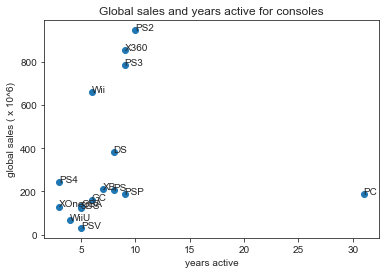

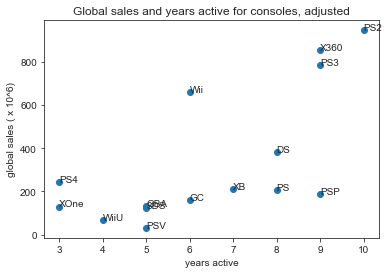

the pc games are obviously an outlier so lets remove that point, and do it again:


In [96]:
z = list(yrRangeData.values())
y = list(globalSales.values())
n = list(df.Platform.unique())

fig, ax = plt.subplots()
plt.scatter(z, y)
plt.title('Global sales and years active for consoles')
plt.xlabel('years active')
plt.ylabel('global sales ( x 10^6)')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.savefig('Global sales and years active for consoles.png', bbox_inches='tight')
plt.show()
# the pc games are obviously an outlier so lets remove them, and do it again:


yrRangeData.pop('PC')
globalSales.pop('PC')
platforms = list(df.Platform.unique())
platforms.remove('PC')

z = list(yrRangeData.values())
y = list(globalSales.values())
n = list(platforms)

fig, ax = plt.subplots()
plt.scatter(z, y)
plt.title('Global sales and years active for consoles, adjusted')
plt.xlabel('years active')
plt.ylabel('global sales ( x 10^6)')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
    
plt.savefig('Global sales and years active for consoles, adjusted.png', bbox_inches='tight')
plt.show()    
print("the pc games are obviously an outlier so lets remove that point, and do it again:")

Now if we have a look at the different consoles listed here, we can try and compare different consoles that have been active for the same number of years:

 - GC and Wii
 - DS and PS
 - PS4 and XOne

the first pair, GC and Wii, have ~6 years where they had new games released, and they have approximately the same number of games released, however the expected release date are ~5 years apart, and the GC faced stiff competition from PS2 (which would have been favoured given the success of the PS in mean global sales).

The second pair, DS and PS had expected release dates are ~9 years apart, which means inflation would've had a considerably larger effect upon price of goods particularly in 2007-08 where the [GFC] (https://www.treasury.gov/connect/blog/pages/the-financial-crisis-five-years-later.aspx) occurred.

The third pair however, is almost perfect, the release dates of the PS4 and XOne are almost identical (15/11/2013, and 22/11/2013 only a week apart!), they have therefore been active for the same amount of time, and there is a larger selection of games available for PS4, however the mean sales are also larger, so the larger number of games is not the root cause of its greater global sales

## PS4 vs XOne
below is a description of the data for the PS4 and XOne:

In [97]:
dfConsole['XOne'].describe()

,Year_of_Release,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,NA,JP,EU,OTHER
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2014.899371,0.264277,0.475346,0.001824,0.072893,0.814906,73.729560,6.493082,0.955975,0.113208,0.949686,0.836478
std,0.982086,0.394140,0.641632,0.006044,0.095569,1.051570,12.990106,1.338435,0.205799,0.317847,0.219284,0.371010
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.010000,20.000000,2.100000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,0.040000,0.075000,0.000000,0.010000,0.135000,67.500000,5.800000,1.000000,0.000000,1.000000,1.000000
50%,2015.000000,0.110000,0.220000,0.000000,0.040000,0.410000,77.000000,6.700000,1.000000,0.000000,1.000000,1.000000
75%,2016.000000,0.315000,0.630000,0.000000,0.110000,1.200000,83.000000,7.500000,1.000000,0.000000,1.000000,1.000000
max,2016.000000,2.190000,3.220000,0.040000,0.480000,5.480000,97.000000,9.200000,1.000000,1.000000,1.000000,1.000000


In [98]:
dfConsole['PS4'].describe()

,Year_of_Release,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,NA,JP,EU,OTHER
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2015.046025,0.467699,0.352134,0.038870,0.158033,1.016862,72.669456,6.739331,0.861925,0.523013,0.866109,0.870293
std,0.922396,0.900162,0.574838,0.069342,0.260914,1.669753,12.204987,1.455229,0.345703,0.500518,0.341250,0.336686
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.010000,19.000000,1.500000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,0.030000,0.025000,0.000000,0.010000,0.080000,67.000000,6.100000,1.000000,0.000000,1.000000,1.000000
50%,2015.000000,0.130000,0.100000,0.010000,0.050000,0.320000,74.000000,7.000000,1.000000,1.000000,1.000000,1.000000
75%,2016.000000,0.450000,0.410000,0.050000,0.175000,1.135000,81.000000,7.800000,1.000000,1.000000,1.000000,1.000000
max,2016.000000,6.310000,3.960000,0.490000,1.970000,12.610000,97.000000,9.200000,1.000000,1.000000,1.000000,1.000000


we can see that the mean sales in the US is the only region in the world where XOne mean sales are greater than PS4 mean sales:

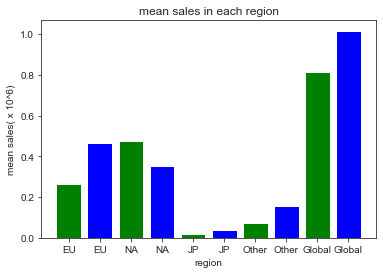

In [99]:
regions = ['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

region = {}
for i in regions:
    region[i] = ({'PS4' : dfConsole['PS4'].describe()[i]['mean'], 'XOne' : dfConsole['XOne'].describe()[i]['mean'] })

    
valuelist = [0.264277, 0.467699, 0.475346, 0.352134, 0.01824, 0.038870, 0.072893, 0.158033, 0.814906, 1.016862]

    

vert = valuelist
plt.bar(x = list(range(0,10)), height = vert, color = ['green', 'blue','green', 'blue','green', 'blue','green', 'blue','green', 'blue'])
plt.title('mean sales in each region')
plt.xlabel('region')
plt.ylabel('mean sales( x 10^6)')
plt.xticks(list(range(0,10)), ['EU', 'EU', 'NA', 'NA', 'JP', 'JP', 'Other', 'Other', 'Global', 'Global'])


plt.savefig('mean sales in each region.png', bbox_inches='tight')
plt.show()

Despite the popularity in North America, XOne is beat by PS4 in all other regions particularly EU, which makes it seem like the company licensing games for the PS4 is offering more than XOne equivalent, indicated by the global Sales of PS4 exceeding XOne's by $200,000 .

Microsoft produces XOne consoles and is based in North America, which leads to the assumption of brand loyalty and this idea of American Manufactoring and Nationalism tipping the scales in favor of XOne only in NA, whereas the rest of the world appears to choose the more successful brand of PS4.

Another thing we could talk about which is not on the dataset we are analysing is the prevalence of exclusive games on PS4 and XOne. PS4 releases a significantly greater quantity of games exclusive to the PS4 than XOne does, which is another reason, perhaps why PS4 games on average have greater sales.

We could also look at the critic and user score averages for the games, and we can see that the critic ratings are approximately the same:( */100)

XOne: 73.729560
PS4: 72.669456

but the user scores: ( */10)

XOne: 6.493082
PS4: 6.739331

lean slightly in favour of the PS4, by about 2.4\% compared to the difference in critic scores: 1.1\%
It is difficult to draw conclusions from this, but I believe that the user scores are more to be trusted (insert citation for professional critics being bought out (hotels, cars, other products), or otherwise biased)
This in combination with the larger number of games might explain the PS4 Global Sales being twice the XOne global sales.

So when looking for success in selling games, make lots of them, and try to make them halfway decent.

## Conclusion
It would appear that as expected there is a correlation between The years active and the global sales for a console, however there are two trend lines (unexpected) which correlate to the more popular consoles, and the less popular consoles. From my analysis it looks like this divide between more and less popular can be sorted by critic score, and then after that it is simply about how many games are released for the console.